## **Project Overview** 

*Content-Based Filtering for book recommendations*

Objective: Suggest similar books to a given book based on their characteristics. **What books would you recommend to someone who likes book X?**

How will I do it?

Approach/Metric to calculate similarity between observations: <u>cosine similarity</u> - we look at angle between two vectors

Why cosine similarity?
1. Focuses on direction -  unlike Euclidean distance, which considers both magnitude and length, cosine similarity emphasizes the direction of the vectors. 
2. Handles high dimensions
3. Works well with sparse data (which often includes many zero values) 

Required input data: 
* rows: items -> books,
* columns: item characteristics -> author, title, language, year of publication etc. 

The dataset is large and detailed, requiring me to reduce the number of records to manage computational resources. 

Book recommendation dataset you can find [here](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

### Table of contents

<ul>
    <li><a href="#chapter1" style="color: #0b7285;">1. Data wrangling - detailed explanations</a></li>
    <ul>
        <li><a href="#section_1_1" style="color: #0b7285">1.1. Feature selection</a></li>
        <li><a href="#section_1_2" style="color: #0b7285">1.2. Missing values</a></li>
        <li><a href="#section_1_3" style="color: #0b7285">1.3. Authors</a></li>
        <li><a href="#section_1_4" style="color: #0b7285">1.4. ISBN</a></li>
        <li><a href="#section_1_5" style="color: #0b7285">1.5. The removal of duplicates</a></li>
        <li><a href="#section_1_6" style="color: #0b7285">1.6. Language</a></li>
        <li><a href="#section_1_7" style="color: #0b7285">1.7. Book title</a></li>
        <li><a href="#section_1_8" style="color: #0b7285">1.8. Year of publication</a></li>
        <li><a href="#section_1_9" style="color: #0b7285">1.9. Category</a></li>
    </ul>
    <li><a href="#chapter2" style="color: #0b7285">2. Data wrangling - just essential steps</a></li>
    <li><a href="#chapter3" style="color: #0b7285">3. Data reduction</a></li>
    <ul>
        <li><a href="#section_3_1" style="color: #0b7285">3.1 Authors</a></li>
        <li><a href="#section_3_2" style="color: #0b7285">3.2 Category</a></li>
        <li><a href="#section_3_3" style="color: #0b7285">3.3 Publisher</a></li>
    </ul>
    <li><a href="#chapter4" style="color: #0b7285">4. Final data preparation</a></li>
    <ul>
        <li><a href="#section_4_1" style="color: #0b7285">4.1 Encoding</a></li>
        <li><a href="#section_4_2" style="color: #0b7285">4.2 Standardization</a></li>
    </ul>
    <li><a href="#chapter5" style="color: #0b7285">5. Cosine similarity</a></li>
    <li><a href="#chapter6" style="color: #0b7285">6. Recommendation</a></li>
    <ul>
        <li><a href="#section_6_1" style="color: #0b7285">6.1 Example</a></li>
        <li><a href="#section_6_2" style="color: #0b7285">6.2 Function</a></li>
    </ul>
</ul>


## **Modules**

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

## **Data wrangling - detailed explanations** <a id="chapter1"></a>

Original data 

In [10]:
data_raw = pd.read_csv('Preprocessed_data.csv')
data_raw.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


First impression

In [12]:
data_raw.shape

(1031175, 19)

Over 1 million rows! This is quite a large dataset. It contains information about both users and books. 

In [14]:
data_raw['user_id'].nunique()

92107

In [15]:
data_raw['isbn'].nunique()

270170

Our database contains around 100,000 users who have read or purchased one or more books from a collection of nearly 300,000 titles along with ratings they provided (if available). Each row represents data related to a specific reader, identified by a unique user_id. 

In [17]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  int64  
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

### **Feature selection** <a id="section_1_1"></a>

I removed the following columns:
- Unnamed:0 - no meaningful information, this is just an observation indicator that works as an index
- imgages : img_s, img_m, img_l
- summary - every book has a different summary + if this is the user's summary, it may be useful for text mining
- user data: user_id, location, age, rating, city, state, country

In short, I kept only the variables associated directly with the books.

Book data 

In [21]:
data_book_original = data_raw[['isbn','book_title','book_author','year_of_publication','publisher','Language','Category']]
data_book_original

,isbn,book_title,book_author,year_of_publication,publisher,Language,Category
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,en,['Social Science']
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
...,...,...,...,...,...,...,...
1031170,743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000,Simon & Schuster,en,['Humor']
1031171,767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books,en,['Nature']
1031172,884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books,9,9
1031173,912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books,en,['Fiction']


In [22]:
data_book_original.columns = ['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher','language', 'category']

In [23]:
data_book = data_book_original.copy()

### **Missing values** <a id="section_1_2"></a>

In [25]:
data_book.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              0
language               0
category               0
dtype: int64

#### **Remove NANs**

In [27]:
data_book = data_book.dropna()

In [28]:
#Sanity check 
data_book.shape

(1031174, 7)

In [29]:
data_book.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
language               0
category               0
dtype: int64

Even though missing values are not explicitly shown, they still exist. The features "language" and "category" have the value "9," which does not make sense.

In [31]:
data_book['language'].value_counts()[:10]

language
en    618505
9     398936
de      5725
es      3425
fr      3223
it       732
nl       238
da       119
pt       100
ca        49
Name: count, dtype: int64

In [32]:
data_book['category'].value_counts()[:10]

category
9                                406101
['Fiction']                      385135
['Juvenile Fiction']              39617
['Biography & Autobiography']     22390
['Humor']                          8500
['History']                        8249
['Religion']                       7291
['Juvenile Nonfiction']            5473
['Social Science']                 5264
['Body, Mind & Spirit']            4541
Name: count, dtype: int64

In the "language" column, the value "9" appears 398,937 times, making it the second most frequent value after "en." In the "category" column, "9" appears 406,102 times, making it the most frequent value.

#### **Remove other missing values - 9 values**

In [35]:
data_book = data_book[~((data_book['language'] == '9') | (data_book['category'] == '9'))]

In [36]:
data_book.shape

(625073, 7)

In [37]:
data_book_original.shape[0] - data_book.shape[0]

406102

We removed 406,102 rows. 

### **Authors** <a id="section_1_3"></a>

In [40]:
data_book.head()

,isbn,book_title,book_author,year_of_publication,publisher,language,category
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,en,['Social Science']
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']


Lowercase & Uppercase authors

Let's see if there are any authors written only in lowercase or in uppercase.

In [43]:
author_lowercase = data_book[data_book['book_author'].str.islower()]['book_author']
author_lowercase.head()

116225    various authors
116226    various authors
116227    various authors
500325       asha bandele
500326       asha bandele
Name: book_author, dtype: object

In [44]:
author_lowercase.shape[0]

52

In [45]:
author_uppercase = data_book[data_book['book_author'].str.isupper()]['book_author']
author_uppercase.head()

3478    MICHAEL CRICHTON
3479    MICHAEL CRICHTON
3480    MICHAEL CRICHTON
3481    MICHAEL CRICHTON
3482    MICHAEL CRICHTON
Name: book_author, dtype: object

In [46]:
author_uppercase.shape[0]

40548

I've just realized that the values in the book_author field are inconsistent. For example, there are 52 names in lowercase and over 40,000 names in uppercase. I'm now wondering if some of these entries represent the same authors but with different formatting—for instance, one time in uppercase and another in lowercase. Let's investigate.

In [48]:
author_uppercase_changed = author_uppercase.str.lower().unique()
author_uppercase_changed

array(['michael crichton', 'isaac asimov', 'arthur phillips', ...,
       'matt mitter', 'natalie standiford', 'jan lebeyka'], dtype=object)

In [49]:
data_book[data_book['book_author'].isin(author_uppercase_changed)]

,isbn,book_title,book_author,year_of_publication,publisher,language,category
777811,439597528,Shiloh,phyllis reynolds naylor,2000,scholastic,en,['Animal welfare']
777812,439597528,Shiloh,phyllis reynolds naylor,2000,scholastic,en,['Animal welfare']


In [50]:
data_book[data_book['book_title'] == 'Shiloh']

,isbn,book_title,book_author,year_of_publication,publisher,language,category
550154,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550155,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550156,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550157,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550158,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550159,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550160,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550161,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550162,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']
550163,440802970,Shiloh,Phyllis Reynolds Naylor,1992,Bantam Doubleday Dell Publishing Group,en,['Animal welfare']


In [51]:
author_name = "Phyllis Reynolds Naylor"
author_name_upper = author_name.upper()
author_name_upper

'PHYLLIS REYNOLDS NAYLOR'

In [52]:
data_book[data_book['book_author'] == author_name_upper]

,isbn,book_title,book_author,year_of_publication,publisher,language,category
327776,044040407X,One of the Third Grade Thonkers,PHYLLIS REYNOLDS NAYLOR,1991,Yearling,en,['Juvenile Fiction']
327777,044040407X,One of the Third Grade Thonkers,PHYLLIS REYNOLDS NAYLOR,1991,Yearling,en,['Juvenile Fiction']
327778,044040407X,One of the Third Grade Thonkers,PHYLLIS REYNOLDS NAYLOR,1991,Yearling,en,['Juvenile Fiction']
327779,044040407X,One of the Third Grade Thonkers,PHYLLIS REYNOLDS NAYLOR,1991,Yearling,en,['Juvenile Fiction']
673489,440409446,Alice in April,PHYLLIS REYNOLDS NAYLOR,1995,Yearling,en,['Families']
673490,440409446,Alice in April,PHYLLIS REYNOLDS NAYLOR,1995,Yearling,en,['Families']
913056,440406854,RELUCTANTLY ALICE (Alice),PHYLLIS REYNOLDS NAYLOR,1992,Yearling,en,['Juvenile Fiction']
913057,440406854,RELUCTANTLY ALICE (Alice),PHYLLIS REYNOLDS NAYLOR,1992,Yearling,en,['Juvenile Fiction']
913058,440406854,RELUCTANTLY ALICE (Alice),PHYLLIS REYNOLDS NAYLOR,1992,Yearling,en,['Juvenile Fiction']


One author’s name is written in at least three different ways: Phyllis Reynolds Naylor, PHYLLIS REYNOLDS NAYLOR, and phyllis reynolds naylor. 

#### **Standardize the authors' names and convert each name to lowercase**

In [55]:
data_book.loc[:, 'book_author'] = data_book['book_author'].str.lower()

### **ISBN** <a id="section_1_4"></a>

I found that some ISBN numbers end with either 'X' or 'x' (uppercase or lowercase). Additionally, there are identical ISBNs where the only difference between the entries is whether 'x' is uppercase or lowercase.

In [58]:
data_book[data_book.duplicated(subset=['book_title', 'book_author', 'year_of_publication', 'publisher', 'language', 'category'], keep=False)]

,isbn,book_title,book_author,year_of_publication,publisher,language,category
1,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
2,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
3,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
4,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
5,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
...,...,...,...,...,...,...,...
1029720,590386522,Scooby-Doo on Zombie Island (Scooby-Doo),gail herman,1998,Scholastic,en,['Juvenile Fiction']
1029721,590386522,Scooby-Doo on Zombie Island (Scooby-Doo),gail herman,1998,Scholastic,en,['Juvenile Fiction']
1029731,895777010,Don't Forget The Oatmeal! A Word Book (Sesame ...,b. g. ford,1993,Reader's Digest,en,['Grocery shopping']
1029732,895777010,Don't Forget The Oatmeal! A Word Book (Sesame ...,b. g. ford,1993,Reader's Digest,en,['Grocery shopping']


In [60]:
data_book[data_book['book_title'] == "One Thousand Chestnut Trees"]

,isbn,book_title,book_author,year_of_publication,publisher,language,category
1020000,000225669x,One Thousand Chestnut Trees,mira stout,1994,Harpercollins Publisher,en,['East and West']
1029645,000225669X,One Thousand Chestnut Trees,mira stout,1994,Harpercollins Publisher,en,['East and West']


In [61]:
# values_with_x_or_X = data_book[data_book['isbn'].str.contains(r'[x]$')]
# values_with_x_or_X

#### **Standardize the ISBNs**

In [63]:
data_book.loc[:, 'isbn'] = data_book['isbn'].str.replace(r'x$', 'X', regex=True)

### **The removal of duplicates** <a id="section_1_5"></a>

In [65]:
data_book = data_book.drop_duplicates()

In [66]:
data_book.shape

(138548, 7)

### **Language** <a id="section_1_6"></a>

In [68]:
data_book['language'].value_counts()

language
en       134693
es         1427
fr         1010
de          990
it          157
nl           75
da           53
pt           47
ca           30
ms           10
no            7
zh-CN         7
la            6
gl            5
ja            5
ru            4
ga            3
ar            3
el            2
fa            2
vi            2
pl            1
tl            1
th            1
ro            1
cy            1
eo            1
gd            1
hi            1
zh-TW         1
ko            1
Name: count, dtype: int64

In [69]:
data_book['language'].value_counts().shape[0]

31

The dataset includes a total of 31 different languages, with English being the most prevalent.
    
Languages like Spanish, French, and German are better represented than others, with 1,427, 1,010, and 990 books respectively. While these languages have a notable presence, they are still significantly less represented compared to English.

The number of books in each language drops sharply after English.

Several languages have very few books, such as Polish, Tagalog, Thai, and others, each with only one book. 


### **Book title** <a id="section_1_7"></a>

In [72]:
data_book['book_title'].value_counts()

book_title
Selected Poems                                                        17
Masquerade                                                            13
The Secret Garden                                                     13
The Secret                                                            11
Wuthering Heights                                                     10
                                                                      ..
Cos  3: Lanterns of God (Chronicles of Scar, No 3)                     1
Buddy Holly Is Alive and Well on Ganymede                              1
Aretha: From These Roots                                               1
The Whore's Child : and Other Stories (Vintage Contemporaries)         1
The Are You Being Served? Stories: 'Camping In' and Other Fiascoes     1
Name: count, Length: 128838, dtype: int64

There are some books with identical titles. It might be that those books share only title but differ in details, such as the author, publication year and other attributes.
Moreover, books with the same title might differ only in the year of publication, reflecting updates or new editions over the years.

### **Year of publication** <a id="section_1_8"></a>

In [75]:
data_book['year_of_publication'].value_counts().head(20)

year_of_publication
1999    9860
2002    9683
2001    9559
2000    9558
1998    9228
1997    8844
2003    8289
1996    8195
1994    7710
1995    7644
1993    5704
1992    5430
1991    4611
1990    4288
1989    3829
2004    3788
1988    3367
1987    2919
1986    2388
1985    1959
Name: count, dtype: int64

The most recent years, particularly from the late 1990s to early 2000s, show a high number of publications.

In [77]:
data_book['year_of_publication'].value_counts().sort_index()

year_of_publication
1378       1
1901       2
1910       1
1911       4
1914       1
        ... 
2003    8289
2004    3788
2005      26
2006       2
2008       1
Name: count, Length: 89, dtype: int64

The earliest publication year recorded is 1378, with only one book from this year.

The dataset spans more extensively from 1901 through to 2008.

### **Category** <a id="section_1_9"></a>

In [80]:
#data_book['category'].value_counts()

In [81]:
data_book['category'].value_counts()[:20]

category
['Fiction']                      53109
['Juvenile Fiction']             10274
['Biography & Autobiography']     5375
['Religion']                      3523
['History']                       3507
['Juvenile Nonfiction']           2931
['Social Science']                2282
['Business & Economics']          2103
['Body, Mind & Spirit']           1706
['Health & Fitness']              1693
['Family & Relationships']        1678
['Cooking']                       1668
['Humor']                         1586
['Computers']                     1417
['Psychology']                    1166
['Self-Help']                     1113
['Science']                       1085
['Travel']                        1073
['Poetry']                         972
['Literary Criticism']             938
Name: count, dtype: int64

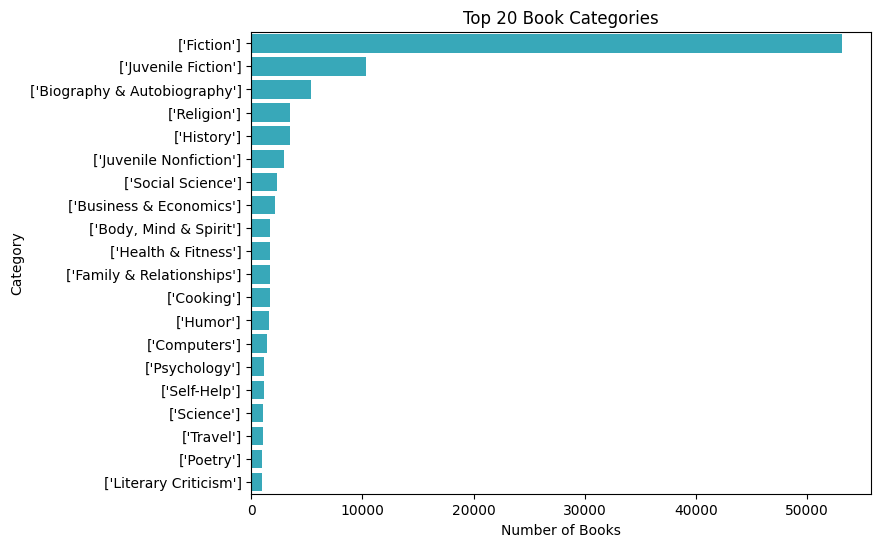

In [82]:
top_20_categories = data_book['category'].value_counts().head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_20_categories.values, y=top_20_categories.index, color =  '#22b8cf')

plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.title('Top 20 Book Categories')

plt.show()

The dataset is predominantly focused on Fiction, which makes up the largest portion. It also includes a significant number of Juvenile Fiction books. Various non-fiction categories such as Biography, Religion, and History are well-represented, along with practical topics like Business, Health, and Self-Help. There is a broad range of genres, reflecting a diverse collection of interests.

## **Data wrangling - just essential steps** <a id="chapter2"></a>

All the transformations that were made above are gathered here in one block of code.

In [86]:
data_book_original

,isbn,book_title,book_author,year_of_publication,publisher,language,category
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,en,['Social Science']
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,en,['Actresses']
...,...,...,...,...,...,...,...
1031170,743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000,Simon & Schuster,en,['Humor']
1031171,767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books,en,['Nature']
1031172,884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books,9,9
1031173,912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books,en,['Fiction']


In [87]:
data_book = data_book_original.copy()
data_book = data_book.dropna()
data_book = data_book[~((data_book['language'] == '9') | (data_book['category'] == '9'))]
data_book.loc[:, 'book_author'] = data_book['book_author'].str.lower()
data_book.loc[:, 'isbn'] = data_book['isbn'].str.replace(r'x$', 'X', regex=True)
data_book = data_book.drop_duplicates()
data_book = data_book.reset_index(drop=True)
data_book

,isbn,book_title,book_author,year_of_publication,publisher,language,category
0,195153448,Classical Mythology,mark p. o. morford,2002,Oxford University Press,en,['Social Science']
1,2005018,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,en,['Actresses']
2,60973129,Decision in Normandy,carlo d'este,1991,HarperPerennial,en,['1940-1949']
3,374157065,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999,Farrar Straus Giroux,en,['Medical']
4,393045218,The Mummies of Urumchi,e. j. w. barber,1999,W. W. Norton & Company,en,['Design']
...,...,...,...,...,...,...,...
138543,312266448,The Military Quotation Book : Revised and Expa...,james charlton,2002,Thomas Dunne Books,en,['Reference']
138544,067161746X,The Bachelor Home Companion: A Practical Guide...,p.j. o'rourke,1987,Pocket Books,en,['Humor']
138545,743203763,As Hogan Said . . . : The 389 Best Things Anyo...,randy voorhees,2000,Simon & Schuster,en,['Humor']
138546,767907566,All Elevations Unknown: An Adventure in the He...,sam lightner,2001,Broadway Books,en,['Nature']


## **Data reduction** <a id="chapter3"></a>

Due to computational constraints, I need to reduce the number of rows in the dataset. I will filter out categories from features that are not prevalent, those that appear in fewer than a specified number of observations.

In [90]:
data_books_reduced = data_book.copy()

In [91]:
data_books_reduced.shape

(138548, 7)

In [92]:
def get_frequent_categories(feature, min_number_of_obser):
    value_counts = data_books_reduced[feature].value_counts()
    filtered_counts = value_counts[value_counts > min_number_of_obser]
    print(f'Number of categories: {filtered_counts.shape[0]}')
    return filtered_counts

In [93]:
def ds_reduction_by_feature(feature, to_index):
    reduced_list = data_books_reduced[feature].value_counts()[:to_index].index
    data_books_modified = data_books_reduced[data_books_reduced[feature].isin(reduced_list)]
    return data_books_modified

#### **Authors** <a id="section_3_1"></a>

In [95]:
data_books_reduced['book_author'].value_counts()

book_author
francine pascal              303
ann m. martin                282
william shakespeare          252
carolyn keene                235
agatha christie              212
                            ... 
jacob                          1
boileau-narceja                1
pierre magnan                  1
helgerson marie-christine      1
jeremy lloyd                   1
Name: count, Length: 59233, dtype: int64

The list of authors is extensive and diverse, with approximately 60,000 entries. Additionally, some authors appear only once in the dataset.

In [97]:
get_frequent_categories('book_author', 15) # authors that wrote more than 15 books (from the dataset)

Number of categories: 976


book_author
francine pascal        303
ann m. martin          282
william shakespeare    252
carolyn keene          235
agatha christie        212
                      ... 
cathy williams          16
janice bennett          16
susan wittig albert     16
joanna wayne            16
david baldacci          16
Name: count, Length: 976, dtype: int64

In [98]:
data_books_reduced = ds_reduction_by_feature('book_author', 976)
data_books_reduced

,isbn,book_title,book_author,year_of_publication,publisher,language,category
5,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction']
8,074322678X,Where You'll Find Me: And Other Stories,ann beattie,2002,Scribner,en,['Fiction']
13,440234743,The Testament,john grisham,1999,Dell,en,['Fiction']
14,452264464,Beloved (Plume Contemporary Fiction),toni morrison,1994,Plume,en,['Fiction']
18,61076031,Mary-Kate & Ashley Switching Goals (Mary-Kate ...,mary-kate & ashley olsen,2000,HarperEntertainment,en,['Juvenile Fiction']
...,...,...,...,...,...,...,...
138470,155661585X,Paige (Springsong Series),judy baer,1995,Baker Book House,en,['Christian fiction']
138491,1569870535,Incredible Dinosaurs to Look at (Share a Book),landoll,1993,"Landoll, Inc.",en,['Dinosaurs']
138493,1569875197,The Little Mermaid (Fairy Tale Classics Storyb...,landoll,2001,Landoll,en,['Juvenile Fiction']
138506,1577191641,The Tale of Squirrel Nutkin,beatrix potter,1997,Inchworm Press,en,['Owls']


By narrowing the dataset to just 976 authors, we reduced the number of rows from 138,548 to 29,866 — a significant decrease.

#### **Category** <a id="section_3_2"></a>

In [101]:
data_books_reduced['category'].value_counts()

category
['Fiction']                                      16955
['Juvenile Fiction']                              4267
['Juvenile Nonfiction']                            347
['Biography & Autobiography']                      327
['Humor']                                          315
                                                 ...  
['Solar system']                                     1
['Calvin (Fictitious character : Watterson)']        1
['Civilization, Modern']                             1
['Popularity']                                       1
['Alternative histories']                            1
Name: count, Length: 1689, dtype: int64

We operate now on reduced dataset. We have around 1689 different categories. I will do the same as it was with authors, so i will limit their number by filtering only those that appear in more than 10 numbers of observations. We will reduce their number to 150. 

In [103]:
get_frequent_categories('category', 20)

Number of categories: 71


category
['Fiction']                      16955
['Juvenile Fiction']              4267
['Juvenile Nonfiction']            347
['Biography & Autobiography']      327
['Humor']                          315
                                 ...  
['JUVENILE FICTION']                23
['Horror stories.']                 22
['Authors, American']               22
['Dating (Social customs)']         21
['Great Britain']                   21
Name: count, Length: 71, dtype: int64

In [104]:
data_books_reduced = ds_reduction_by_feature('category', 71)
data_books_reduced

,isbn,book_title,book_author,year_of_publication,publisher,language,category
5,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction']
8,074322678X,Where You'll Find Me: And Other Stories,ann beattie,2002,Scribner,en,['Fiction']
13,440234743,The Testament,john grisham,1999,Dell,en,['Fiction']
14,452264464,Beloved (Plume Contemporary Fiction),toni morrison,1994,Plume,en,['Fiction']
18,61076031,Mary-Kate & Ashley Switching Goals (Mary-Kate ...,mary-kate & ashley olsen,2000,HarperEntertainment,en,['Juvenile Fiction']
...,...,...,...,...,...,...,...
138451,886776295,The World Wreckers (Darkover : Against the Ter...,marion zimmer bradley,1994,Daw Books,en,['Fiction']
138459,895653095,"Word Bird's Winter Words (Moncure, Jane Belk. ...",jane belk moncure,1985,Childs World,en,['Juvenile Fiction']
138465,935180087,Stories of Hawaii (Tales of the Pacific),jack london,1984,Mutual Publishing,en,['Fiction']
138470,155661585X,Paige (Springsong Series),judy baer,1995,Baker Book House,en,['Christian fiction']


We are now working with a reduced dataset that contains approximately 1,700 different categories. To streamline further, I will apply a similar approach as with the authors, filtering to retain only those categories that appear in more than 20 observations. This reduces the number of categories to 71.

#### **Publisher** <a id="section_3_3"></a>

In [107]:
data_books_reduced['publisher'].value_counts()

publisher
Harlequin                    1875
Silhouette                    828
Scholastic                    726
Ballantine Books              626
Pocket                        538
                             ... 
Grolier Book Club Edition       1
Imajinn Books                   1
Longman Publishing Group        1
Marlowe & Company               1
Mutual Publishing               1
Name: count, Length: 1395, dtype: int64

In [108]:
get_frequent_categories('publisher', 20)

Number of categories: 186


publisher
Harlequin                        1875
Silhouette                        828
Scholastic                        726
Ballantine Books                  626
Pocket                            538
                                 ... 
Spectra                            21
Alianza                            21
Little Simon                       21
Random House Value Publishing      21
Touchstone                         21
Name: count, Length: 186, dtype: int64

In [109]:
data_books_reduced = ds_reduction_by_feature('publisher', 208)
data_books_reduced

,isbn,book_title,book_author,year_of_publication,publisher,language,category
5,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction']
8,074322678X,Where You'll Find Me: And Other Stories,ann beattie,2002,Scribner,en,['Fiction']
13,440234743,The Testament,john grisham,1999,Dell,en,['Fiction']
18,61076031,Mary-Kate & Ashley Switching Goals (Mary-Kate ...,mary-kate & ashley olsen,2000,HarperEntertainment,en,['Juvenile Fiction']
20,689821166,Flood : Mississippi 1927,kathleen duey,1998,Aladdin,en,['Juvenile Fiction']
...,...,...,...,...,...,...,...
138428,821758284,A Winter Wedding,janice bennett,1998,Zebra Books,en,['Fiction']
138436,842341110,Back to the Drawing Board (Mcgee and Me Ser No 6),not applicable (na ),1990,Tyndale House Pub,en,['Christian life']
138441,871238284,"Love Comes Softly (Love Comes Softly, Book 1)",janette oke,1985,Baker Pub Group,en,['Christian fiction']
138442,871239809,"Love's Unfolding Dream (Love Comes Softly, Boo...",janette oke,1987,Baker Pub Group,en,['Fiction']


We applied the same approach to the publishers, retaining only those who have published more than 20 books. This resulted in 208 publishers being included in the dataset.

## **Final data preparation** <a id="chapter4"></a>

1. Cosine similarity measures the angle between two vectors, which is not directly applicable to categorical data in its raw form, so that we have to encode any categorical variable before imputing it to a model. 

2. Standardization (scaling features to have a mean of 0 and a standard deviation of 1) is generally less critical for cosine similarity than for distance-based models (like Euclidean distance), because cosine similarity is based on the angle between vectors rather than their magnitude. However, in our case, some features have vastly different scales (years vs. 0/1 columns after one-hot encoding), standardizing them can still be beneficial to ensure that all features contribute equally to the similarity measure and avoid any unintended biases. 

### **Encoding** <a id="section_4_1"></a>

In [114]:
data_books_encoded = data_books_reduced.set_index('isbn')
data_books_encoded.index.name = None
data_books_encoded = data_books_encoded.drop(['book_title'],axis =1 )
data_books_encoded = pd.get_dummies(data_books_encoded).astype(int)
data_books_encoded

,year_of_publication,book_author_a. a. milne,book_author_a. g. cascone,book_author_aesop,book_author_agatha christie,book_author_aimee thurlo,book_author_alan dean foster,book_author_albert camus,book_author_aldous huxley,book_author_alex ross,...,category_['Reference'],category_['Religion'],category_['Romance fiction'],category_['Science fiction'],"category_['Science fiction, American']",category_['Science'],category_['Self-Help'],category_['Social Science'],category_['Travel'],category_['True Crime']
399135782,1991,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
074322678X,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440234743,1999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61076031,2000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689821166,1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821758284,1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842341110,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871238284,1985,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871239809,1987,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Standardization** <a id="section_4_2"></a>

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_books_encoded)
X_scaled

array([[-0.54672906, -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355],
       [ 1.02520731, -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355],
       [ 0.59649739, -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355],
       ...,
       [-1.4041489 , -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355],
       [-1.11834229, -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355],
       [-0.11801914, -0.02746967, -0.0240194 , ..., -0.04666978,
        -0.03770063, -0.03053355]])

## **Cosine similarity** <a id="chapter5"></a>

In [118]:
cosine_matrix = pd.DataFrame(cosine_similarity(X_scaled))
cosine_matrix.index = data_books_encoded.index
cosine_matrix.columns = data_books_encoded.index
cosine_matrix

,399135782,074322678X,440234743,61076031,689821166,345402871,345417623,425099148,553278398,60168013,...,688313833,689818661,698114191,081674209X,821753436,821758284,842341110,871238284,871239809,886776295
399135782,1.000000,-0.001009,-0.001219,-0.003800,-0.002521,-0.001362,-0.001596,-0.002420,-0.000495,-0.000608,...,-0.000523,-0.001995,-0.002335,-0.002290,-0.000919,-0.000931,-0.001573,-0.001287,-0.000342,-0.001358
074322678X,-0.001009,1.000000,-0.000409,-0.002485,-0.001876,-0.000787,-0.000390,-0.001397,-0.001268,-0.000767,...,-0.009851,-0.001484,-0.001849,-0.001800,-0.000655,-0.000417,-0.001893,-0.002057,-0.001290,-0.001429
440234743,-0.001219,-0.000409,1.000000,-0.003832,-0.002774,-0.001268,-0.000945,-0.002252,-0.001459,-0.000989,...,-0.010191,-0.002194,-0.002682,-0.002617,-0.000982,-0.000744,-0.002465,-0.002533,-0.001429,-0.001920
61076031,-0.003800,-0.002485,-0.003832,1.000000,0.004912,-0.005025,-0.004583,-0.008939,-0.004290,-0.003302,...,0.001307,0.003907,0.004566,-0.001196,-0.003739,-0.003178,-0.001452,-0.001680,-0.003994,-0.006667
689821166,-0.002521,-0.001876,-0.002774,0.004912,1.000000,-0.003548,-0.003361,-0.006311,-0.002797,-0.002233,...,0.002694,0.002622,0.003086,-0.000878,-0.002610,-0.002272,-0.000911,-0.000986,-0.002562,-0.004554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821758284,-0.000931,-0.000417,-0.000744,-0.003178,-0.002272,-0.001068,-0.000870,-0.001896,-0.001091,-0.000774,...,-0.007235,-0.001797,-0.002183,-0.002132,0.070593,1.000000,-0.001934,-0.001945,-0.001050,-0.001526
842341110,-0.001573,-0.001893,-0.002465,-0.001452,-0.000911,-0.002893,-0.003113,-0.005146,-0.001589,-0.001527,...,0.002076,-0.000719,-0.000816,-0.000755,-0.002038,-0.001934,1.000000,-0.000162,-0.001320,-0.003256
871238284,-0.001287,-0.002057,-0.002533,-0.001680,-0.000986,-0.002843,-0.003261,-0.005058,-0.001189,-0.001342,...,0.005217,-0.000779,-0.000849,-0.000794,-0.001955,-0.001945,-0.000162,1.000000,0.726245,-0.002955
871239809,-0.000342,-0.001290,-0.001429,-0.003994,-0.002562,-0.001468,-0.001927,-0.002610,-0.000153,-0.000495,...,0.003122,-0.002028,-0.002331,-0.002290,-0.000943,-0.001050,-0.001320,0.726245,1.000000,-0.001215


## **Recommendation** <a id="chapter6"></a>

### **Example - 399135782** <a id="section_6_1"></a>

I want to recommend the top 10 books based on their characteristics, as the best matches for the book with ISBN 399135782.

In [122]:
data_books_reduced[data_books_reduced['isbn'] == "399135782"]

,isbn,book_title,book_author,year_of_publication,publisher,language,category
5,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction']


In [123]:
top_10_for_399135782 = cosine_matrix[['399135782']].sort_values(by = '399135782', ascending = False)[:11] #10 the most similar books 
top_10_for_399135782

,399135782
399135782,1.000000
689806167,0.925371
689846177,0.924822
679748083,0.919745
375701524,0.919448
399134204,0.906595
399146431,0.905967
080410753X,0.901953
080411109X,0.901792
1560549483,0.806893


In [124]:
top_10_for_399135782_df = top_10_for_399135782.copy()
top_10_for_399135782_df = top_10_for_399135782_df.reset_index()
top_10_for_399135782_df.columns = ['isbn','cosine_similarity']
top_10_for_399135782_df

,isbn,cosine_similarity
0,399135782,1.000000
1,689806167,0.925371
2,689846177,0.924822
3,679748083,0.919745
4,375701524,0.919448
5,399134204,0.906595
6,399146431,0.905967
7,080410753X,0.901953
8,080411109X,0.901792
9,1560549483,0.806893


In [125]:
top_10_books_details_for_399135782 = data_books_reduced.loc[data_books_reduced['isbn'].isin(top_10_for_399135782.index),:]
top_10_books_details_for_399135782

,isbn,book_title,book_author,year_of_publication,publisher,language,category
5,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction']
267,399146431,The Bonesetter's Daughter,amy tan,2001,Putnam Publishing Group,en,['Fiction']
2015,679748083,The Kitchen God's Wife (Vintage Contemporaries),amy tan,1993,Vintage Books USA,en,['Fiction']
6640,080411109X,The Hundred Secret Senses,amy tan,1996,Ivy Books,en,['Fiction']
20089,080410753X,The Kitchen God's Wife,amy tan,1992,Ivy Books,en,['Fiction']
27586,399134204,Joy Luck Club,amy tan,1989,Putnam Publishing Group,en,['Fiction']
33323,375701524,The Hundred Secret Senses,amy tan,1998,Vintage Books USA,en,['Fiction']
79518,689806167,The Moon Lady (Aladdin Picture Books),amy tan,1995,Aladdin,en,['Juvenile Fiction']
79519,689846177,"Sagwa, The Chinese Siamese Cat",amy tan,2001,Aladdin,en,['Juvenile Fiction']
112685,1560549483,Kitchen God's Wife (Thorndike Paperback Bestse...,amy tan,1992,Thorndike Press,en,['Fiction']


**Top 10 Recommended Books Similar to "The Kitchen God's Wife"**

For readers who enjoyed "The Kitchen God's Wife" by Amy Tan, published in 1991 by Putnam Pub Group and categorized under fiction, here are the top 10 recommended books with similar characteristics.

In [128]:
top_10_for_399135782_books_and_details = pd.merge(top_10_books_details_for_399135782, top_10_for_399135782_df, on='isbn', how='inner').sort_values(by='cosine_similarity', ascending = False).reset_index(drop=True) 
top_10_for_399135782_books_and_details

,isbn,book_title,book_author,year_of_publication,publisher,language,category,cosine_similarity
0,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction'],1.000000
1,689806167,The Moon Lady (Aladdin Picture Books),amy tan,1995,Aladdin,en,['Juvenile Fiction'],0.925371
2,689846177,"Sagwa, The Chinese Siamese Cat",amy tan,2001,Aladdin,en,['Juvenile Fiction'],0.924822
3,679748083,The Kitchen God's Wife (Vintage Contemporaries),amy tan,1993,Vintage Books USA,en,['Fiction'],0.919745
4,375701524,The Hundred Secret Senses,amy tan,1998,Vintage Books USA,en,['Fiction'],0.919448
5,399134204,Joy Luck Club,amy tan,1989,Putnam Publishing Group,en,['Fiction'],0.906595
6,399146431,The Bonesetter's Daughter,amy tan,2001,Putnam Publishing Group,en,['Fiction'],0.905967
7,080410753X,The Kitchen God's Wife,amy tan,1992,Ivy Books,en,['Fiction'],0.901953
8,080411109X,The Hundred Secret Senses,amy tan,1996,Ivy Books,en,['Fiction'],0.901792
9,1560549483,Kitchen God's Wife (Thorndike Paperback Bestse...,amy tan,1992,Thorndike Press,en,['Fiction'],0.806893


The recommendations make sense. In the top 10 books, all of them are authored by the same writer and their publication years are consistent. 8/10 books fall into the fiction category and all are in English. The only notable difference is the publisher.

### **Function that makes life easier :))** <a id="section_6_2"></a>

In [131]:
def highlight_first_row(row):
        if row.name == 0:
            return ['background-color: #22b8cf'] * len(row)
        else:
            return [''] * len(row)

In [132]:
def recommend_10_books_to_book(book_isbn):
    print(f'10 books for {book_isbn}')
    top_10 = cosine_matrix[[book_isbn]].sort_values(by = book_isbn, ascending = False)[:11] #10 the most similar books 
    top_10 = top_10.reset_index()
    top_10.columns = ['isbn','cosine_similarity']
    
    top_10_books_details = data_books_reduced.loc[data_books_reduced['isbn'].isin(top_10['isbn'].values),:]
    df = pd.merge(top_10_books_details, top_10, on='isbn', how='inner').sort_values(by='cosine_similarity', ascending = False).reset_index(drop=True) #Joins the two DataFrames on the isbn column. Ensures that only rows with matching ISBNs are retained (how='inner').     
    styled_df = df.style.apply(highlight_first_row, axis=1)
    
    return styled_df

Let's check the previous book. 

In [134]:
recommend_10_books_to_book('399135782')

10 books for 399135782


,isbn,book_title,book_author,year_of_publication,publisher,language,category,cosine_similarity
0,399135782,The Kitchen God's Wife,amy tan,1991,Putnam Pub Group,en,['Fiction'],1.000000
1,689806167,The Moon Lady (Aladdin Picture Books),amy tan,1995,Aladdin,en,['Juvenile Fiction'],0.925371
2,689846177,"Sagwa, The Chinese Siamese Cat",amy tan,2001,Aladdin,en,['Juvenile Fiction'],0.924822
3,679748083,The Kitchen God's Wife (Vintage Contemporaries),amy tan,1993,Vintage Books USA,en,['Fiction'],0.919745
4,375701524,The Hundred Secret Senses,amy tan,1998,Vintage Books USA,en,['Fiction'],0.919448
5,399134204,Joy Luck Club,amy tan,1989,Putnam Publishing Group,en,['Fiction'],0.906595
6,399146431,The Bonesetter's Daughter,amy tan,2001,Putnam Publishing Group,en,['Fiction'],0.905967
7,080410753X,The Kitchen God's Wife,amy tan,1992,Ivy Books,en,['Fiction'],0.901953
8,080411109X,The Hundred Secret Senses,amy tan,1996,Ivy Books,en,['Fiction'],0.901792
9,1560549483,Kitchen God's Wife (Thorndike Paperback Bestsellers),amy tan,1992,Thorndike Press,en,['Fiction'],0.806893


The function works very well. Let's test it with another book.

In [136]:
recommend_10_books_to_book('440234743')

10 books for 440234743


,isbn,book_title,book_author,year_of_publication,publisher,language,category,cosine_similarity
0,440234743,The Testament,john grisham,1999,Dell,en,['Fiction'],1.000000
1,440225701,The Street Lawyer,john grisham,1999,Dell,en,['Fiction'],1.000000
2,385319053,The Firm,john grisham,1997,Dell,en,['Fiction'],0.999958
3,044022165X,The Rainmaker,john grisham,1996,Dell,en,['Fiction'],0.999905
4,440241537,The King of Torts,john grisham,2003,Dell,en,['Fiction'],0.999832
5,440211727,A Time to Kill,john grisham,1992,Dell,en,['Fiction'],0.999485
6,044023722X,A Painted House,john grisham,2001,Dell Publishing Company,en,['Fiction'],0.850388
7,440241073,The Summons,john grisham,2002,Dell Publishing Company,en,['Fiction'],0.850352
8,440220602,The Chamber,john grisham,1995,Dell Publishing Company,en,['Fiction'],0.850206
9,440213525,The Client,john grisham,1994,Dell Publishing Company,en,['Fiction'],0.850110


Comment 

The top 10 recommended books are all by the same author, which seems to be a common trend. All of these books are in English and classified as fiction, and they were published around the same years. The top-ranked book has a cosine similarity score of 1, indicating it shares nearly identical characteristics with "The Testament," differing only in title. The other books also have high cosine similarity scores.